In [1]:
# 퍼셉트론은 임계치를 0으로 만들어놓고, 가중치와 입력값을 곱한 후 편향을 더하여 총합이 0이면 미출력, 1이면 출력.
# b + w1x1+ w2x2 <= 0 print(0)
# b + w1x1 + w2x2 > 0 print(1)

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.datasets as ds 

In [71]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

🔴 퍼셉트론은 임계치를 0으로 만들어놓고, 가중치와 입력값을 곱한 후 편향을 더하여 총합이 0이면 미출력, 1이면 출력.

 b + w1x1+ w2x2 <= 0 print(0)

 b + w1x1 + w2x2 > 0 print(1)

In [3]:
a = tf.random.uniform([2,3],0,1)
a

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[0.19772995, 0.8299359 , 0.12803233],
       [0.5840374 , 0.99432755, 0.06150448]], dtype=float32)>

In [4]:
# 딥러닝 데이터를 텐서(tensor) 자료구조로 표현, 신경망의 가중치도 텐서
# 다차원배열을 --> 텐서라고 부름.
# mnist 원소 하나 28 * 28 2차원 텐서
# mnist -- 60,000 * 28 * 28 3차원 텐서
# 동영상 --> 4차원 텐서
# 인간의 한계로 인해서 5차원 텐서까지만 사용

🔴 텐서가 제공하는 데이터셋의 텐서 구조를 확인

In [7]:
# 텐서는 튜플 형태로 받아오고, sklearn은 x,x,y,y로 받아옴.
(x_train,y_train),(x_test,y_test) = ds.mnist.load_data()
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [9]:
# y_train을 one-hot으로 변경
# one-hot-encoding 범주형 카테고리 값들을 해당 인덱스 값만 1로 두고 나머지는 0으로 표시.

from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
y_train_sk = ohe.fit_transform(y_train.reshape(-1,1)) # sklearn(2차원 배열을 원함.): toarray -> astype(int)

y_train_tf = tf.one_hot(y_train,10) # 텐서플로우 형태

import pandas as pd
y_train_pd = pd.get_dummies(y_train) # 일반적인 형태

In [12]:
y_train_sk.toarray().astype('int8') # sklearn 계열

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]], dtype=int8)

In [13]:
y_train_tf

<tf.Tensor: shape=(60000, 10), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)>

In [14]:
y_train_pd

,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,1,0
59996,0,0,0,1,0,0,0,0,0,0
59997,0,0,0,0,0,1,0,0,0,0
59998,0,0,0,0,0,0,1,0,0,0


In [16]:
# OR 데이터
x = [
    [0.0,0.0],[0.0,1.0],[1.0,0.0],[1.0,1.0]
]
y = [
    [-1],[1],[1],[1]
]

In [17]:
# 신경망 기초 그림 4-10 (b)의 구조를 텐서로 구현
# 퍼셉트론의 가중치와 bias를 초기화
# 텐서는 넘파이와 완벽하게 호환... 데이터를 구성할 때 variable 대신에 numpy array를 사용해도 무관

w = tf.Variable([[1.0],[1.0]])
b = tf.Variable(-0.5)

# w = np.array([[1.0],[1.0]])
# b = np.array(-0.5)


<기본적인 텐서 연산>

 tf.add : 덧셈 수행

 tf.subtract : 뺄셈 수행
 
 tf.multiply : 곱셈 수행

 tf.truediv : 나눗셈의 몫

 tf.mod : 나눗셈의 나머지

 tf.abs : 절대값

 tf.negative 음수 반환

 tf.sign 부호 반환 (음수: -1,양수: 1,0)

 tf.square 제곱 수행

 tf.sqrt 제곱근 반환

 tf.pow 거듭제곱 수행

 tf.maximum 최대값을 반환

 tf.minimum 최소값을 반환

 tf.exp 지수 값

 tf.log 로그 값


# ◼️ 퍼셉트론 동작

In [63]:
s = tf.add(tf.matmul(x,w),b) #matmul은 행렬, tf.add는 덧셈
o = tf.sign(s) # tf.sign은 부호를 출력

In [64]:
o

<tf.Tensor: shape=(4, 1), dtype=float32, numpy=
array([[-1.],
       [ 1.],
       [ 1.],
       [ 1.]], dtype=float32)>

# ◼️ 퍼셉트론 학습
### 데이터는 위에 만든 x,y를 사용

In [65]:
# 가중치 초기화: 가중치 소실을 방지하기 위하여.
# tf.random.uniform은 랜덤 난수 지정. [2,1]은 텐서 형태, -0.5가 최솟값, 0.5가 최댓값
w = tf.Variable(tf.random.uniform([2,1],-0.5,0.5)) 
b = tf.Variable(tf.zeros([1]))

In [66]:
w

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[-0.2644384 ],
       [-0.33150733]], dtype=float32)>

In [22]:
# 옵티마이저
opt = tf.keras.optimizers.SGD(learning_rate=0.1)

In [67]:
# 전방계산식
def forward():
    s = tf.add(tf.matmul(x,w),b)
    o = tf.tanh(s) # tanh 활성화 함수
    return o

In [68]:
# 손실 함수(오차 계산): mse(평균 제곱 오차)
def loss():
    o = forward()
    return tf.reduce_mean((y-o)**2)

In [69]:
# 500 세대까지 학습(100세 마다 정보를 출력)
for i in range(500):
    opt.minimize(loss,var_list=[w,b])
    if (i%100 == 0): print(f"loss at epoch : {i} = {loss().numpy()}")

loss at epoch : 0 = 1.2633445262908936
loss at epoch : 100 = 0.0994817465543747
loss at epoch : 200 = 0.04416537657380104
loss at epoch : 300 = 0.027364909648895264
loss at epoch : 400 = 0.019563348963856697


In [70]:
# 학습된 데이터를 OR 데이터로 예측
o = forward()
o

<tf.Tensor: shape=(4, 1), dtype=float32, numpy=
array([[-0.81464237],
       [ 0.8853504 ],
       [ 0.8853601 ],
       [ 0.99924487]], dtype=float32)>

# ◼️ 케라스를 이용한 퍼셉트론 학습

#### 데이터는 or 데이터를 사용하고
#### 신경망 구조를 설계
#### 신경망으로 학습
#### 예측

In [28]:
# x,y가 지정이 되어지지 않았을 경우를 대비하여,,,
# x = [[0.0, 0.0], [0.0, 1.0], [1.0, 0.0], [1.0, 1.0]]
# y = [[-1], [1], [1], [1]]
x,y

([[0.0, 0.0], [0.0, 1.0], [1.0, 0.0], [1.0, 1.0]], [[-1], [1], [1], [1]])

In [29]:
# 신경망 구조 설계
n_input = 2
n_output = 1
perceptron = Sequential() # 시퀀스 객체 
perceptron.add(Dense(n_output,activation='tanh',input_shape=(n_input,) # 층을 쌓음. n_output 출력층(단층 퍼셉트론이기 때문에 1),input_shape는 입력층
                    ,kernel_initializer='random_uniform'))             # kernel_intializer은 최초 커널의 값

In [30]:
# 신경망 학습 compile, fit
perceptron.compile(loss='mse',optimizer= SGD(learning_rate=0.1), metrics=['mse']) # 위에서 learning_rate를 설정해주었기 때문.
perceptron.fit(x,y,epochs=500,verbose=2) #verbose는 출력 표시 값인데, 0은 출력 안함, 1은 자세히, 2는 함축적 정보.

Epoch 1/500
1/1 - 0s - loss: 0.9825 - mse: 0.9825 - 132ms/epoch - 132ms/step


2023-02-02 15:45:49.655510: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Epoch 2/500
1/1 - 0s - loss: 0.7410 - mse: 0.7410 - 3ms/epoch - 3ms/step
Epoch 3/500
1/1 - 0s - loss: 0.6352 - mse: 0.6352 - 1ms/epoch - 1ms/step
Epoch 4/500
1/1 - 0s - loss: 0.5829 - mse: 0.5829 - 1ms/epoch - 1ms/step
Epoch 5/500
1/1 - 0s - loss: 0.5510 - mse: 0.5510 - 2ms/epoch - 2ms/step
Epoch 6/500
1/1 - 0s - loss: 0.5280 - mse: 0.5280 - 3ms/epoch - 3ms/step
Epoch 7/500
1/1 - 0s - loss: 0.5094 - mse: 0.5094 - 1ms/epoch - 1ms/step
Epoch 8/500
1/1 - 0s - loss: 0.4932 - mse: 0.4932 - 2ms/epoch - 2ms/step
Epoch 9/500
1/1 - 0s - loss: 0.4786 - mse: 0.4786 - 2ms/epoch - 2ms/step
Epoch 10/500
1/1 - 0s - loss: 0.4649 - mse: 0.4649 - 2ms/epoch - 2ms/step
Epoch 11/500
1/1 - 0s - loss: 0.4519 - mse: 0.4519 - 2ms/epoch - 2ms/step
Epoch 12/500
1/1 - 0s - loss: 0.4395 - mse: 0.4395 - 2ms/epoch - 2ms/step
Epoch 13/500
1/1 - 0s - loss: 0.4275 - mse: 0.4275 - 2ms/epoch - 2ms/step
Epoch 14/500
1/1 - 0s - loss: 0.4160 - mse: 0.4160 - 2ms/epoch - 2ms/step
Epoch 15/500
1/1 - 0s - loss: 0.4050 - mse: 0.

In [31]:
predict = perceptron.predict(x)
predict

1/1 [==============================] - 0s 56ms/step


array([[-0.8162529 ],
       [ 0.8863337 ],
       [ 0.8863194 ],
       [ 0.99926543]], dtype=float32)

In [32]:
# 텐서를 이용한 학습
o

<tf.Tensor: shape=(4, 1), dtype=float32, numpy=
array([[-0.81833375],
       [ 0.88757676],
       [ 0.8875876 ],
       [ 0.9992915 ]], dtype=float32)>

In [33]:
# 다층 퍼셉트론으로 MNIST 인식

In [36]:
# mnist에서 읽어와서 신경망 입력할 형태로 변환
import numpy as np
(x_train,y_train),(x_test,y_test) = ds.mnist.load_data()

# 텐서 모양을 2차원 텐서
x_train.shape # (60000,28,28)
x_train = x_train.reshape(-1,28*28)
x_test = x_test.reshape(-1,28*28)
# 표준화 - narray 변경
x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0

# loss 함수의 선택 여부에 따라서 one-hot -- cat.....
# 변경하지 않음.. spare...

In [37]:
# 신경망 구조 설계 밀집층 2개 구조
# 파이퍼 파라미네터...
# input, hidden, output은 고정.
n_input = 28*28
n_hidden = 1023
n_output = 10

# multi-layer perceptron
mlp = Sequential()
mlp.add(Dense(n_hidden, activation='relu', input_shape = (n_input,), kernel_initializer='random_uniform',
             bias_initializer='zeros'))
mlp.add(Dense(n_output,activation='softmax'))
mlp.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,optimizer = Adam(learning_rate=0.001),metrics=['accuracy'])

In [38]:
 hist = mlp.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_test,y_test),verbose=2)

Epoch 1/30
469/469 - 2s - loss: 0.2382 - accuracy: 0.9305 - val_loss: 0.1189 - val_accuracy: 0.9635 - 2s/epoch - 4ms/step
Epoch 2/30
469/469 - 2s - loss: 0.0908 - accuracy: 0.9738 - val_loss: 0.0810 - val_accuracy: 0.9744 - 2s/epoch - 4ms/step
Epoch 3/30
469/469 - 2s - loss: 0.0577 - accuracy: 0.9824 - val_loss: 0.0683 - val_accuracy: 0.9779 - 2s/epoch - 4ms/step
Epoch 4/30
469/469 - 2s - loss: 0.0399 - accuracy: 0.9879 - val_loss: 0.0721 - val_accuracy: 0.9779 - 2s/epoch - 5ms/step
Epoch 5/30
469/469 - 2s - loss: 0.0294 - accuracy: 0.9908 - val_loss: 0.0664 - val_accuracy: 0.9793 - 2s/epoch - 4ms/step
Epoch 6/30
469/469 - 2s - loss: 0.0200 - accuracy: 0.9943 - val_loss: 0.0672 - val_accuracy: 0.9800 - 2s/epoch - 4ms/step
Epoch 7/30
469/469 - 2s - loss: 0.0149 - accuracy: 0.9957 - val_loss: 0.0556 - val_accuracy: 0.9826 - 2s/epoch - 4ms/step
Epoch 8/30
469/469 - 2s - loss: 0.0101 - accuracy: 0.9974 - val_loss: 0.0635 - val_accuracy: 0.9801 - 2s/epoch - 4ms/step
Epoch 9/30
469/469 - 2s 

# ◼️시각화

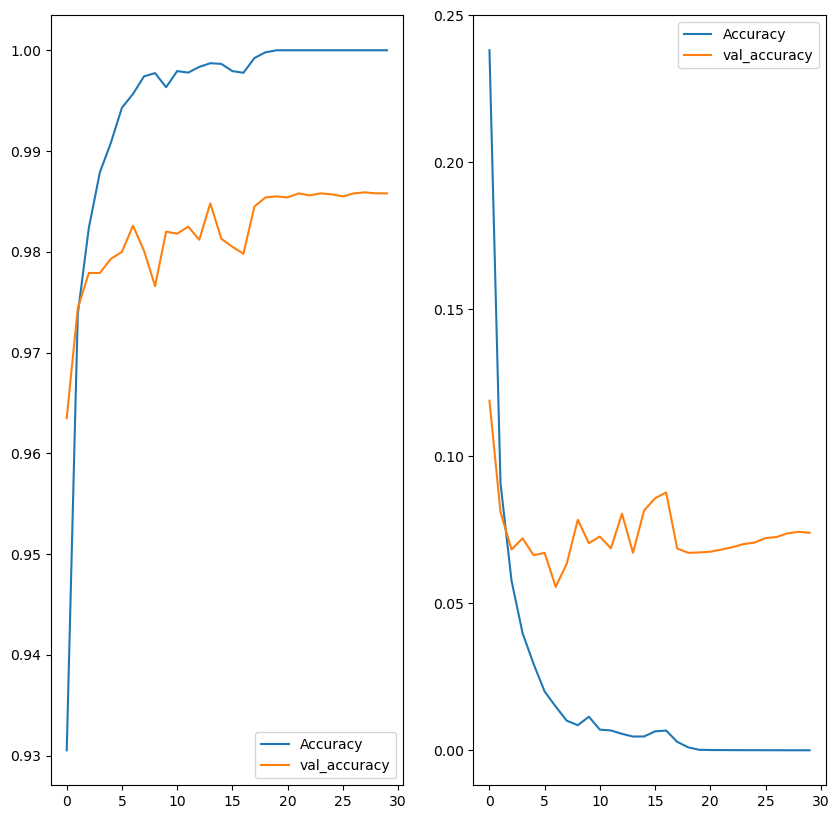

In [40]:
# 정확률
plt.figure(figsize=(10,10))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)
ax1.plot(hist.history['accuracy'],label='Accuracy')
ax1.plot(hist.history['val_accuracy'],label = 'val_accuracy')
ax1.legend()

#손실률
ax2.plot(hist.history['loss'],label='Accuracy')
ax2.plot(hist.history['val_loss'],label = 'val_accuracy')
ax2.legend()
plt.show()

In [41]:
mlp.evaluate(x_train,y_train), mlp.evaluate(x_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0740 - accuracy: 0.9858


([1.6881502233445644e-05, 1.0], [0.07401062548160553, 0.98580002784729])

# ◼️ fashion mnist로 확장을 해서 신경망 구성하고 학습하고 학습곡선

In [42]:
(x_train,y_train),(x_test,y_test) = ds.fashion_mnist.load_data()

In [43]:
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [44]:
x_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [45]:
# 텐서 모양을 2차원 텐서
x_train = x_train.reshape(-1,28*28)
x_test = x_test.reshape(-1,28*28)
# 표준화 - narray 변경
x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0

In [46]:
n_input = 28*28
n_hidden = 1023
n_output = 10

# multi-layer perceptron
mlp = Sequential()
mlp.add(Dense(n_hidden, activation='relu', input_shape = (n_input,), kernel_initializer='random_uniform',
             bias_initializer='zeros'))
mlp.add(Dense(n_output,activation='softmax'))
mlp.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,optimizer = Adam(learning_rate=0.001),metrics=['accuracy'])

In [47]:
hist = mlp.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_test,y_test),verbose=2)

Epoch 1/30
469/469 - 3s - loss: 0.4882 - accuracy: 0.8282 - val_loss: 0.4236 - val_accuracy: 0.8453 - 3s/epoch - 5ms/step
Epoch 2/30
469/469 - 2s - loss: 0.3638 - accuracy: 0.8684 - val_loss: 0.4165 - val_accuracy: 0.8502 - 2s/epoch - 4ms/step
Epoch 3/30
469/469 - 2s - loss: 0.3250 - accuracy: 0.8818 - val_loss: 0.3471 - val_accuracy: 0.8765 - 2s/epoch - 4ms/step
Epoch 4/30
469/469 - 2s - loss: 0.3017 - accuracy: 0.8892 - val_loss: 0.3594 - val_accuracy: 0.8696 - 2s/epoch - 5ms/step
Epoch 5/30
469/469 - 2s - loss: 0.2822 - accuracy: 0.8953 - val_loss: 0.3380 - val_accuracy: 0.8766 - 2s/epoch - 5ms/step
Epoch 6/30
469/469 - 2s - loss: 0.2657 - accuracy: 0.9010 - val_loss: 0.3336 - val_accuracy: 0.8809 - 2s/epoch - 5ms/step
Epoch 7/30
469/469 - 2s - loss: 0.2563 - accuracy: 0.9047 - val_loss: 0.3277 - val_accuracy: 0.8839 - 2s/epoch - 4ms/step
Epoch 8/30
469/469 - 2s - loss: 0.2413 - accuracy: 0.9101 - val_loss: 0.3260 - val_accuracy: 0.8836 - 2s/epoch - 4ms/step
Epoch 9/30
469/469 - 2s 

In [51]:
import matplotlib.pyplot as plt

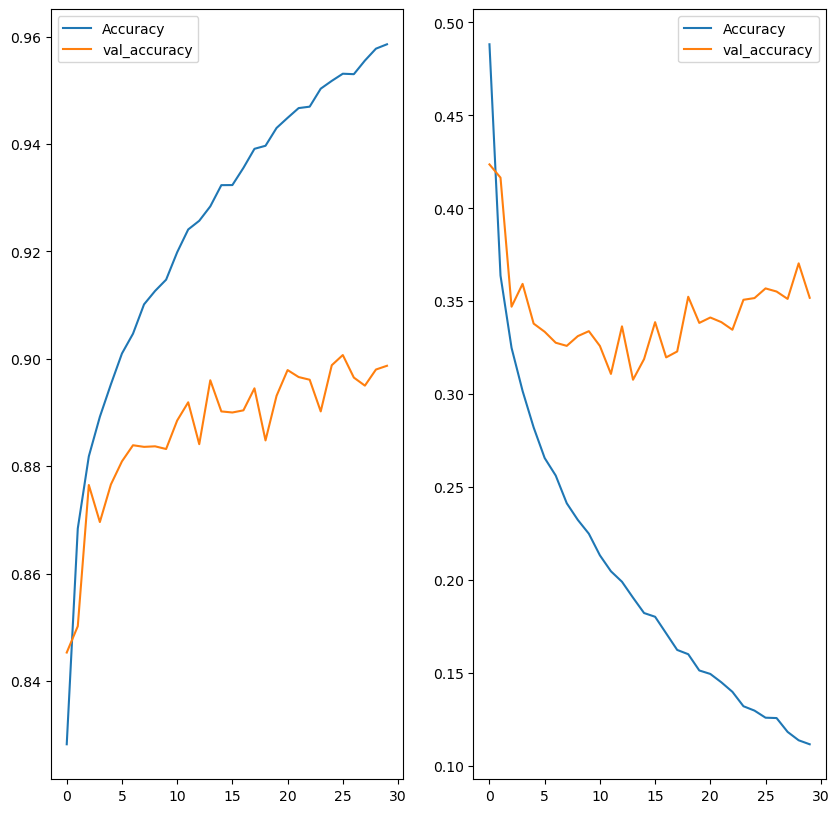

In [52]:
# 정확률
plt.figure(figsize=(10,10))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)
ax1.plot(hist.history['accuracy'],label='Accuracy')
ax1.plot(hist.history['val_accuracy'],label = 'val_accuracy')
ax1.legend()

#손실률
ax2.plot(hist.history['loss'],label='Accuracy')
ax2.plot(hist.history['val_loss'],label = 'val_accuracy')
ax2.legend()
plt.show()

In [59]:
# 신경망 구조
n_input = 784
n_hidden1 = 1024
n_hidden2 = 512
n_hidden3 = 512
n_hidden4 = 512
n_output = 10

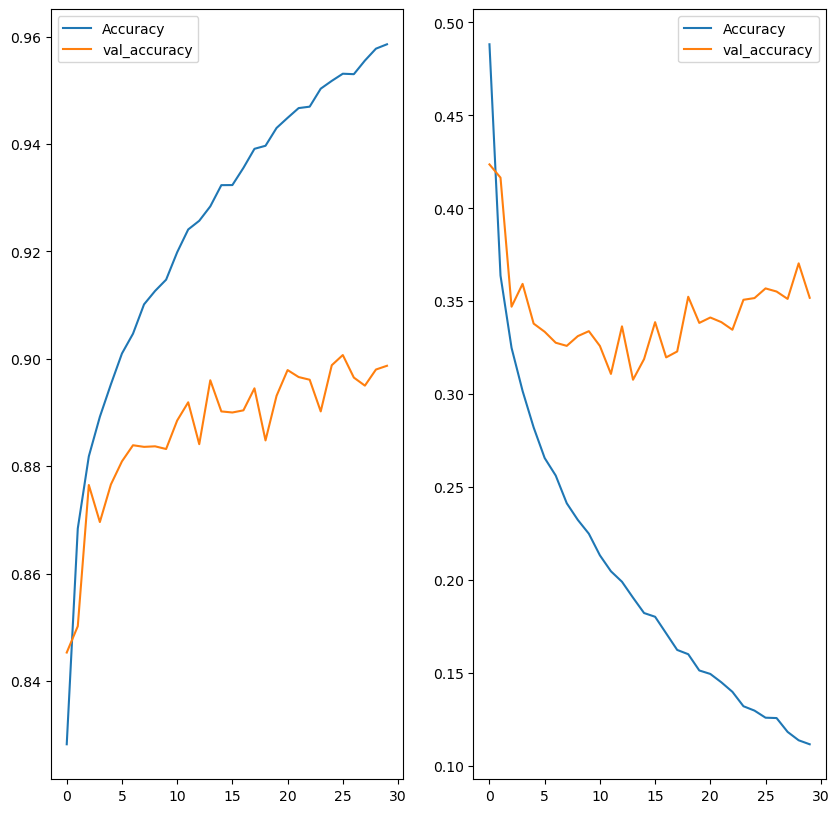

In [61]:
# 학습곡선 시각화 - epoch를 늘리면 추가 개선사항이 있는지와 과적합 여부 및 최적의 epoch 수를 찾기
import matplotlib.pyplot as plt
# 정확률
plt.figure(figsize=(10,10))
ax1 = plt.subplot(1,2,1)
ax2 = plt.subplot(1,2,2)
ax1.plot(hist.history['accuracy'],label='Accuracy')
ax1.plot(hist.history['val_accuracy'],label = 'val_accuracy')
ax1.legend()

#손실률
ax2.plot(hist.history['loss'],label='Accuracy')
ax2.plot(hist.history['val_loss'],label = 'val_accuracy')
ax2.legend()
plt.show()